In [ ]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Necessary libraries
import os 

# Set Directory path for Dataset
os.chdir("/content/drive/My Drive/")

In [ ]:
import pandas as pd
import numpy as np
import pickle
df_stemmed_bn = pd.read_pickle('df_stemmed_bn.pkl')
data = pd.read_pickle('NewspaperBD.pkl')

In [ ]:
import pandas as pd
df_Text = pd.read_csv('Text3.csv')
label = pd.read_csv('Sentiment of NewspaperBD.csv')

In [ ]:
import numpy as np
label['review'] = np.nan

In [ ]:
f1 = label['sentiment'] == 0
f2 = label['sentiment'] == 1

In [ ]:
label.loc[f1,'review'] = 'negative'
label.loc[f2,'review'] = 'positive'

In [ ]:
!pip install unidecode

     |████████████████████████████████| 245kB 8.3MB/s 


In [ ]:
df = pd.DataFrame(columns = ['sentence','sentiment'])
df['sentence'] = df_stemmed_bn['text_en_clean_3'].copy()
df['sentiment'] = label['sentiment'].copy()

In [ ]:
display(df)

,sentence,sentiment
0,সর্বোচ্চ সংখ্যা স্বাস্থ্য অধিদপ্তর মহাপরিচালক ...,0
1,টাঙ্গাইল চামচাম নির্মাতা প্রাদুর্ভাব লকডাউন বি...,0
2,শাটডাউন মোকাবেলা পরিবার উদ্যান সুবিধা মাসব্যাপ...,1
3,বগুড়া পরিবার পজিটিভ পরীক্ষা করেছেন কমপক্ষ বোগ...,0
4,করোনাভাইরাস স্বাস্থ্য মন্ত্রনালয় সরকারি কর্মক...,1
...,...,...
15560,আক্রান্ত সংখ্যা করোনাভাইরাসের সংক্রমণ নজিরবিহী...,0
15561,করোনাভাইরাস যাত্রী দিয়েছে করোনাভাইরাস বাংলাদেশ...,0
15562,বাংলাদেশিদের নির্দেশ প্রধানমন্ত্রী হাসিনা মারা...,0
15563,করোনাভাইরাস স্বাস্থ্য অধিদপ্তর কন্ট্রোল করোনাভ...,1


In [ ]:
import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Activation,Embedding,Flatten,Bidirectional,MaxPooling2D, Conv1D, MaxPooling1D
from keras.optimizers import SGD,Adam
from keras import regularizers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [ ]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


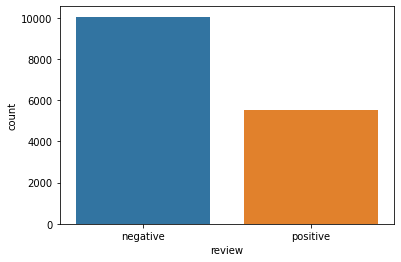

In [ ]:
sns.countplot(label['review']);

In [ ]:
df['sentence'] = df.sentence.apply(lambda x: preprocessing(str(x)))

In [ ]:
df

,sentence,sentiment
0,সর্বোচ্চ সংখ্যা স্বাস্থ্য অধিদপ্তর মহাপরিচালক ...,0
1,টাঙ্গাইল চামচাম নির্মাতা প্রাদুর্ভাব লকডাউন বি...,0
2,শাটডাউন মোকাবেলা পরিবার উদ্যান সুবিধা মাসব্যাপ...,1
3,বগুড়া পরিবার পজিটিভ পরীক্ষা করেছেন কমপক্ষ বোগ...,0
4,করোনাভাইরাস স্বাস্থ্য মন্ত্রনালয় সরকারি কর্মক...,1
...,...,...
15560,আক্রান্ত সংখ্যা করোনাভাইরাসের সংক্রমণ নজিরবিহী...,0
15561,করোনাভাইরাস যাত্রী দিয়েছে করোনাভাইরাস বাংলাদেশ...,0
15562,বাংলাদেশিদের নির্দেশ প্রধানমন্ত্রী হাসিনা মারা...,0
15563,করোনাভাইরাস স্বাস্থ্য অধিদপ্তর কন্ট্রোল করোনাভ...,1


In [ ]:
df.reset_index(drop=True, inplace=True)
df

,sentence,sentiment
0,সর্বোচ্চ সংখ্যা স্বাস্থ্য অধিদপ্তর মহাপরিচালক ...,0
1,টাঙ্গাইল চামচাম নির্মাতা প্রাদুর্ভাব লকডাউন বি...,0
2,শাটডাউন মোকাবেলা পরিবার উদ্যান সুবিধা মাসব্যাপ...,1
3,বগুড়া পরিবার পজিটিভ পরীক্ষা করেছেন কমপক্ষ বোগ...,0
4,করোনাভাইরাস স্বাস্থ্য মন্ত্রনালয় সরকারি কর্মক...,1
...,...,...
15560,আক্রান্ত সংখ্যা করোনাভাইরাসের সংক্রমণ নজিরবিহী...,0
15561,করোনাভাইরাস যাত্রী দিয়েছে করোনাভাইরাস বাংলাদেশ...,0
15562,বাংলাদেশিদের নির্দেশ প্রধানমন্ত্রী হাসিনা মারা...,0
15563,করোনাভাইরাস স্বাস্থ্য অধিদপ্তর কন্ট্রোল করোনাভ...,1


In [ ]:
train1, test1 = train_test_split(df,random_state=69, test_size=0.2)
training_sentences = []
testing_sentences = []



train_sentences=train1['sentence'].values
train_labels=train1['sentiment'].values
for i in range(train_sentences.shape[0]): 
    #print(train_sentences[i])
    x=str(train_sentences[i])
    training_sentences.append(x)
    
training_sentences=np.array(training_sentences)





test_sentences=test1['sentence'].values
test_labels=test1['sentiment'].values

for i in range(test_sentences.shape[0]): 
    x=str(test_sentences[i])
    testing_sentences.append(x)
    
testing_sentences=np.array(testing_sentences)


train_labels=keras.utils.to_categorical(train_labels)


test_labels=keras.utils.to_categorical(test_labels)
print("Training Set Length: "+str(len(train1)))
print("Testing Set Length: "+str(len(test1)))
print("training_sentences shape: "+str(training_sentences.shape))
print("testing_sentences shape: "+str(testing_sentences.shape))
print("train_labels shape: "+str(train_labels.shape))
print("test_labels shape: "+str(test_labels.shape))

Training Set Length: 12452
Testing Set Length: 3113
training_sentences shape: (12452,)
testing_sentences shape: (3113,)
train_labels shape: (12452, 2)
test_labels shape: (3113, 2)


In [ ]:
print(training_sentences[1])
print(train_labels[0])

শরীয়তপুর মেট্রিক ভিজিএফ হয়েছে স্থানীয় প্রশাসন শরীয়তপুর গোশাইরহাট উপজেলা কুচাইপট্টি ইউনিয়ন অরক্ষিত ভিজিএফ কর্মসূচি মেট্রিক ইউনিয়ন গ্রেপ্তার গ্রেপ্তারকৃত বেপারি কুচাইপট্টি ইউনিয়ন ওয়ার্ড আমাদের সংবাদদাতা গোশাইরহাট উপজেলা নির্বাহী কর্মকর্তা আলমগীর রিপোর্ট করেছেন আলোমগি জানিয়েছেন কুচাইপট্টি ইউনিয়ন প্রায় মেট্রিক ভিজিএফ বরাদ্দ দেওয়া হয়েছে যেখানে জানিয়েছে পরিবর্তে দেওয়া ওয়ার্ড মোফাসসা চেয়ারম্যান উদ্দিন কর্তৃক অপব্যবহার হয়েছে চেয়ারম্যান গ্রেপ্তার পেরেছেন করেছেন যোগাযোগ হয়েছে গোশাইরহাট ভারপ্রাপ্ত কর্মকর্তা মোল্লা ব্যাপারে চেয়ারম্যান ওয়ার্ড মোফাসসার বিরুদ্ধ অভিযোগ হয়েছে প্রতিবেদন পর্যন্ত কয়েকটি চেষ্টা সত্ত্ব মন্তব্য যোগাযোগ পারেননি
[0. 1.]


In [ ]:
vocab_size = 60000
embedding_dim = 300
max_length = 200
trunc_type='post'
oov_tok = "<OOV>"

In [ ]:
print(training_sentences.shape)
print(train_labels.shape)

(12452,)
(12452, 2)


In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
print(len(word_index))
print("Word index length:"+str(len(tokenizer.word_index)))
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


test_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(test_sequences,maxlen=max_length)

47588
Word index length:47588


In [ ]:
print("Sentence :--> \n")
print(training_sentences[2]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(sequences[2])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(padded[2])

Sentence :--> 

সালমান পাটানি আজারবাইজান ভাইরাস প্রাদুর্ভাব সালমান পাটানি আজারবাইজান ভাইরাস প্রাদুর্ভাব প্রতিবেদন সালমান পাটানি আজারবাইজান উল্লেখ করোনাভাইরাস প্রাদুর্ভাব বিবেচনা প্রচুর সংখ্যক ভীতিজনক প্রতিবেদন হয়েছে কয়েকজন ইতিমধ্যে শুটিংয় প্রস্তুতি নেওয়ার উদ্দেশ্য হয়েছিল ফিরিয় হয়েছে দ্বিতীয়বার সালমান ভূমিকা পিটিআই বলেছিলেন সালমান জিজ্ঞাসা করেছিলেন বলেছিলাম নেওয়ার রয়েছে ছাড়াও সালমান রেখেছিল পরিচালনা করেছিলেন চরিত্র অভিনয় জ্যাকি অভিনেতা গোবিন্দ নামদেবকে ডব্রিয়াল হয়েছিল সংক্রান্ত সমস্যা পারেনি পিটিআইয় বলেছিলেন সহযোগিতা যাচ্ছিলাম পারিনি ইতিবাচক ভূমিকা ভূমিকা অন্যায় পারিনি অ্যাংরেজি মিডিয়াম প্রচার সামঞ্জস্য ধাক্কা কার্যক ওয়ান্টেড সালমান ফিল্মস প্রোডাকশন প্রোডাকশন ব্যানার সালমান অগ্নিহোত্রি প্রযোজনা প্রেক্ষাগৃহ রয়েছে হিন্দুস্তান আজারবাইজান ওয়ান্টেড প্রতিবেদন হয়েছে করোনভাইরাস বিপজ্জনকভাব দেওয়ার হয়েছে সেখানে অ্যাকশন সিক্যুয়েন্স হয়েছিল সালমান পাটানি আজারবাইজান যাচ্ছিলেন রিপোর্ট উল্লেখ করোনাভাইরাস প্রাদুর্ভাব বিবেচনা সংখ্যক ভীতিজনক প্রতিবেদন হয়েছে ইতিমধ্যে শুটিংয় প্রস্

In [ ]:
print("Padded shape(training): "+str(padded.shape))
print("Padded shape(testing): "+str(testing_padded.shape))

Padded shape(training): (12452, 200)
Padded shape(testing): (3113, 200)


In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())

    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
with tf.device('/gpu:0'):
    model= Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(Conv1D(200, kernel_size=3, activation = "relu"))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Flatten())
    #l2 regularizer
    model.add(Dense(100,kernel_regularizer=regularizers.l2(0.01),activation="relu"))
    model.add(Dense(2, activation='softmax'))
    #sgd= SGD(lr=0.0001,decay=1e-6,momentum=0.9,nesterov=True)
    adam=Adam(learning_rate=0.0005,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)
    model.summary()
    model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc',f1_m,precision_m, recall_m])
    #metrics=['accuracy'],

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 300)          18000000  
_________________________________________________________________
conv1d (Conv1D)              (None, 198, 200)          180200    
_________________________________________________________________
bidirectional (Bidirectional (None, 198, 128)          135680    
_________________________________________________________________
dropout (Dropout)            (None, 198, 128)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 50)                6450      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2

In [ ]:
history=model.fit(padded,train_labels,epochs=5,batch_size=256,validation_data=(testing_padded,test_labels),use_multiprocessing=True, workers=8)

Epoch 1/5
49/49 [==============================] - 15s 309ms/step - loss: 1.2225 - acc: 0.6357 - f1_m: 0.6357 - precision_m: 0.6357 - recall_m: 0.6357 - val_loss: 1.0675 - val_acc: 0.6592 - val_f1_m: 0.6560 - val_precision_m: 0.6560 - val_recall_m: 0.6560
Epoch 2/5
49/49 [==============================] - 14s 276ms/step - loss: 0.9163 - acc: 0.7449 - f1_m: 0.7449 - precision_m: 0.7449 - recall_m: 0.7449 - val_loss: 0.8357 - val_acc: 0.7543 - val_f1_m: 0.7512 - val_precision_m: 0.7512 - val_recall_m: 0.7512
Epoch 3/5
49/49 [==============================] - 14s 277ms/step - loss: 0.6451 - acc: 0.8496 - f1_m: 0.8498 - precision_m: 0.8498 - recall_m: 0.8498 - val_loss: 0.7693 - val_acc: 0.7629 - val_f1_m: 0.7609 - val_precision_m: 0.7609 - val_recall_m: 0.7609
Epoch 4/5
49/49 [==============================] - 14s 276ms/step - loss: 0.4469 - acc: 0.9068 - f1_m: 0.9069 - precision_m: 0.9069 - recall_m: 0.9069 - val_loss: 0.7918 - val_acc: 0.7571 - val_f1_m: 0.7571 - val_precision_m: 0.7571

dict_keys(['loss', 'acc', 'f1_m', 'precision_m', 'recall_m', 'val_loss', 'val_acc', 'val_f1_m', 'val_precision_m', 'val_recall_m'])


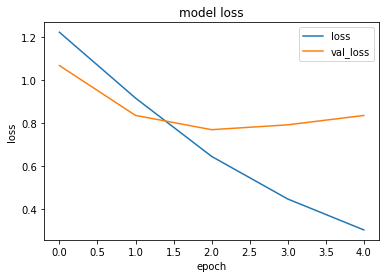

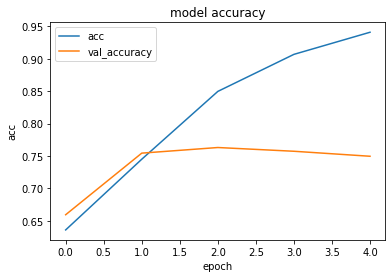

In [ ]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

accuracy = history.history['acc']
val_accuracy= history.history['val_acc']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['acc', 'val_accuracy'])
plt.show()

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(testing_padded,test_labels)
#print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))
print('Loss : ')
print(loss)
print('Accuracy : ')
print(accuracy)
print('F1 score : ')
print(f1_score)
print('Precision : ')
print(precision)
print('Recall : ')
print(recall)

98/98 [==============================] - 2s 16ms/step - loss: 0.8354 - acc: 0.7494 - f1_m: 0.7488 - precision_m: 0.7488 - recall_m: 0.7488
Loss : 
0.8353721499443054
Accuracy : 
0.7494378685951233
F1 score : 
0.7488306760787964
Precision : 
0.7488307356834412
Recall : 
0.7488307356834412


In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(testing_padded,test_labels, verbose=0)
print('Loss : ')
print(loss)
print('Accuracy : ')
print(accuracy)
print('F1 score : ')
print(f1_score)
print('Precision : ')
print(precision)
print('Recall : ')
print(recall)

Loss : 
0.8353721499443054
Accuracy : 
0.7494378685951233
F1 score : 
0.7488306760787964
Precision : 
0.7488307356834412
Recall : 
0.7488307356834412
